In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.python.client import device_lib 
from tensorflow import keras
from tensorflow.keras import layers
import prepdatamodel as pdm

2022-04-11 19:29:42.723326: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-11 19:29:42.723363: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
heart = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
heart.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [4]:
col_bin = ['HeartDisease']

In [5]:
heart = pdm.binary(heart, col_bin)
heart = pdm.age(heart, 'AgeCategory')

In [6]:
heart.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,57,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,85,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,67,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,77,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,42,White,No,Yes,Very good,8.0,No,No,No


In [7]:
heartyes = heart[heart.HeartDisease == 1]
heartno = heart[heart.HeartDisease == 0]
heartnodrop = heartno.sample(frac = 0.9, random_state = 0)
heart = heart.drop(heartnodrop.index)

In [8]:
heart.head(5)
heart.pop('BMI')
heart.pop('MentalHealth')
heart.pop('PhysicalHealth')

5          6.0
10        30.0
23         0.0
29         0.0
35        10.0
          ... 
319765    30.0
319767     0.0
319781     0.0
319786     0.0
319790     7.0
Name: PhysicalHealth, Length: 56615, dtype: float64

In [9]:
col_num = ['AgeCategory' , 'SleepTime']

In [10]:
col_cat = ['Sex', 'Race', 'Diabetic', 'GenHealth','Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [11]:
heart_train = heart.sample(frac = 0.8, random_state = 0)
heart_test = heart.drop(heart_train.index)

In [12]:
heart_train_answer = heart_train.pop("HeartDisease")
heart_test_answer = heart_test.pop("HeartDisease")

In [13]:
Y = heart_train_answer.values
X = pdm.pipeline(heart_train, col_num, col_cat)
Y

array([1, 1, 0, ..., 0, 1, 0])

In [14]:
X.shape

(45292, 35)

In [15]:
y = heart_test_answer.values
x = pdm.pipeline(heart_test, col_num, col_cat)

In [16]:
model = keras.models.Sequential([
keras.layers.Dense(64, activation="relu", input_shape=X.shape[1:]),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dropout(.1),
keras.layers.Dense(1)
])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights= True)
model.compile(loss="mean_squared_error", optimizer= "sgd", metrics=['accuracy'])

2022-04-11 19:29:47.413899: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 19:29:47.414355: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-11 19:29:47.414427: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-04-11 19:29:47.414484: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-04-11 19:29:47.414539: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [17]:
history = model.fit(X, Y, epochs=100, validation_split = 0.3,
                     callbacks=[callback])

Epoch 1/100
991/991 [==============================] - 2s 1ms/step - loss: 0.1856 - accuracy: 0.7259 - val_loss: 0.1703 - val_accuracy: 0.7552
Epoch 2/100
991/991 [==============================] - 1s 1ms/step - loss: 0.1713 - accuracy: 0.7537 - val_loss: 0.1672 - val_accuracy: 0.7599
Epoch 3/100
991/991 [==============================] - 1s 1ms/step - loss: 0.1677 - accuracy: 0.7582 - val_loss: 0.1664 - val_accuracy: 0.7602
Epoch 4/100
991/991 [==============================] - 1s 1ms/step - loss: 0.1668 - accuracy: 0.7585 - val_loss: 0.1659 - val_accuracy: 0.7604
Epoch 5/100
991/991 [==============================] - 1s 1ms/step - loss: 0.1657 - accuracy: 0.7612 - val_loss: 0.1653 - val_accuracy: 0.7622
Epoch 6/100
991/991 [==============================] - 1s 1ms/step - loss: 0.1649 - accuracy: 0.7619 - val_loss: 0.1644 - val_accuracy: 0.7629
Epoch 7/100
991/991 [==============================] - 1s 1ms/step - loss: 0.1642 - accuracy: 0.7629 - val_loss: 0.1652 - val_accuracy: 0.7619

In [18]:
model.save('model1')

2022-04-11 19:30:27.369885: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model1/assets


In [19]:
mse_test = model.evaluate(x, y)
p = model.predict(X).flatten()
for i in range(len(p)):
    p[i] = 1 if p[i] >= 0.5 else 0

354/354 [==============================] - 0s 770us/step - loss: 0.1601 - accuracy: 0.7668


In [20]:
a = Y - p
q=0
for i in range(len(a)):
    a[i] = 1 if a[i] == 1 else 0
    q+=1 if Y[i] == 1 else 0
abs(a).sum()/q

0.212133624613144

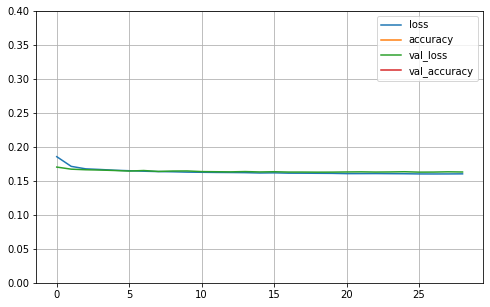

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.4)
plt.show()

import

In [22]:
np.around(model.predict(x[:30]).flatten())

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.], dtype=float32)

In [23]:
y[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1])